In [15]:
%load_ext autoreload
%autoreload 2

from omegaconf import OmegaConf
import wandb_util.wandb_util as wbu
import multiprocessing as mp
from scripts.wandb_experiments.static_texture_benchmark import Method
from scripts.wandb_runs.make_texture import MakeTextureConfig, make_texture
from text3d2video.pipelines.pipeline_utils import ModelConfig
from text3d2video.pipelines.texgen_pipeline import TexGenConfig
from text3d2video.utilities.omegaconf_util import get_import_path
from scripts.wandb_experiments.static_texture_benchmark import (
    Scene,
    StaticTextureBenchmarkConfig,
    texturing_benchmark,
)

mp.set_start_method("spawn", force=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
cat = Scene(
    "cat_statue_mv:latest",
    ["Metalic Cat Statue", "Silver Cat Statue", "Deadpool Cat Statue"],
)
human = Scene("human_mv:latest", ["Deadpool", "Stormtrooper"])

base_config = OmegaConf.structured(
    MakeTextureConfig(
        prompt="",
        animation_tag="",
        model=ModelConfig(),
        texgen=TexGenConfig(module_paths=[0]),
    )
)

method = Method("TexGen", base_config, get_import_path(make_texture))

scenes = [cat, human]
methods = [method]

cfg = StaticTextureBenchmarkConfig(scenes, methods)
cfg = OmegaConf.structured(cfg)
spec = texturing_benchmark(cfg)

In [17]:
wbu.sync_experiment(texturing_benchmark, cfg, "texturing_benchmark")

Experiment: https://wandb.ai/romeu/diffusion-3D-features/groups/texturing_benchmark/workspace
Experiment up-to-date!


In [24]:


exp = "texturing_benchmark"

runs = wbu.get_logged_runs(exp)

In [26]:
from text3d2video.util import group_into_array


def scene_key(run):
    config = OmegaConf.create(run.config)
    return f"{config.animation_tag}-{config.prompt}"


def method_key(run):
    return run.name.split("_")[0]


runs_grouped, labels = group_into_array(runs, [method_key, scene_key])

In [31]:
from scripts.wandb_runs.make_texture import MakeTextureData
from text3d2video.util import map_array

data = map_array(runs_grouped, MakeTextureData.from_run)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


100%|██████████| 5/5 [00:00<00:00, 229.97it/s]

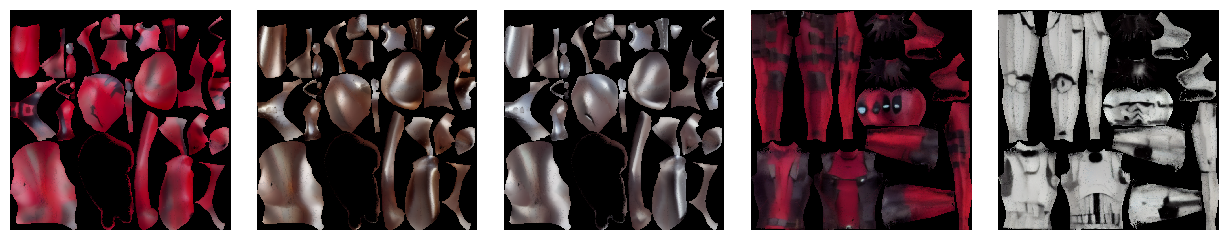

In [88]:

from text3d2video.utilities.ipython_utils import display_ims_grid

textures = map_array(data, lambda d: d.texture.cpu(), pbar=True)

display_ims_grid(textures)